In [ ]:
!pip install imutils
!pip install opencv-python

In [94]:
import keras
import pickle
import cv2
import matplotlib.pyplot as plt 
import numpy as np
from keras.models import load_model
from imutils import paths

In [95]:
model = load_model('model_sederhana.h5')
lb = pickle.loads(open('lable.pickle', 'rb').read())
print('Input NN : ',model.input.shape)
print(model.summary())

Input NN :  (?, 3072)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 1024)              3146752   
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 512)               524800    
_________________________________________________________________
jumlah_prediksi (Dense)      (None, 3)                 1539      
Total params: 3,673,091
Trainable params: 3,673,091
Non-trainable params: 0
_________________________________________________________________
None


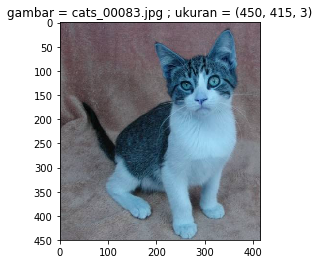

In [96]:
file_gbr = 'dataset/animals/cats/cats_00083.jpg'
gbr = cv2.imread(file_gbr)
plt.title('gambar = '+str(file_gbr.split('/')[3])+' ; ukuran = '+str(gbr.shape))
plt.imshow(gbr)

<h3>ARSITEKTUR NEURAL NETWORK SEDERHANA</h3>

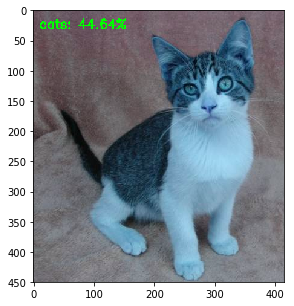

In [97]:
img = gbr.copy()
output = img.copy()
img = cv2.resize(img, (32,32)).flatten()
img_2 = img.reshape([1, 3072])
pred = model.predict(img_2)

i = pred.argmax(axis = 1)[0]
label_class = lb.classes_[i]

text = "{}: {:.2f}%".format(label_class, pred[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# tampilkan gambar

plt.figure(figsize=[5,5])
plt.imshow(output)

<h3>ARSITEKTUR CNN SEDERHANA</h3>

In [98]:
model = load_model('model_cnn.h5')
lb = pickle.loads(open('lable.pickle', 'rb').read())
print('Input NN : ',model.input.shape)
print(model.summary())

Input NN :  (?, 100, 100, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 104, 104, 3)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 34, 34, 16)        1216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 15, 15, 32)        4640      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 15, 15, 64)

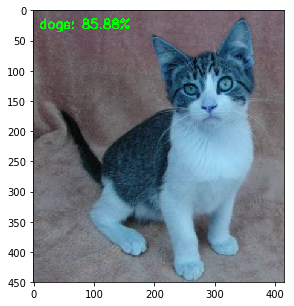

In [99]:
output = gbr.copy()
img_cnn = gbr.copy()
img_c = cv2.resize(img_cnn, (100,100))
img_cc = np.expand_dims(img_c, axis = 0)
pred = model.predict(img_cc)

i = pred.argmax(axis = 1)[0]
label_class = lb.classes_[i]

text = "{}: {:.2f}%".format(label_class, pred[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# tampilkan gambar

plt.figure(figsize=[5,5])
plt.imshow(output)

<h2> BONUS - OBJECT DETECTION [ MobileNet SSD ] </h2>

[INFO] loading model...
[INFO] computing object detections...
[INFO] cat: 99.95%


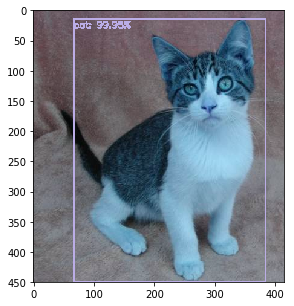

In [102]:
import numpy as np
import argparse
import cv2

CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
    "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
    "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
    "sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(255, 100, size=(len(CLASSES), 3))
print("[INFO] loading model...")
prototxt = 'object_detection/MobileNetSSD_deploy.prototxt.txt'
model_proto = 'object_detection/MobileNetSSD_deploy.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model_proto)


image = cv2.imread(file_gbr)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

for i in np.arange(0, detections.shape[2]):

    confidence = detections[0, 0, i, 2]

    if confidence > 0.2:

        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
        print("[INFO] {}".format(label))
        cv2.rectangle(image, (startX, startY), (endX, endY),COLORS[idx], 2)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)

plt.figure(figsize=[5,5])
plt.imshow(image)